<a href="https://colab.research.google.com/github/annaberezov/akfie927/blob/main/Berezovski_Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Five
##Anna-Maria Berezovski
##CSC 687
##February 28, 2022

## Imports and Data

In [149]:
# Pandas is mainly used for data analysis. Pandas allows importing data from various file formats 
# such as comma-separated values, JSON, SQL, Microsoft Excel. 
# Pandas allows various data manipulation operations such as merging, reshaping, selecting, 
# as well as data cleaning, and data wrangling features.
import pandas as pd

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Read raw filefrom github into a dataframe
# Company_data: Amounts spent on different types of advertisements and the resulting Sales
df = pd.read_csv('letters.csv')

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x-box   20000 non-null  int64 
 1   y-box   20000 non-null  int64 
 2   width   20000 non-null  int64 
 3   high    20000 non-null  int64 
 4   onpix   20000 non-null  int64 
 5   x-bar   20000 non-null  int64 
 6   y-bar   20000 non-null  int64 
 7   x2bar   20000 non-null  int64 
 8   y2bar   20000 non-null  int64 
 9   xybar   20000 non-null  int64 
 10  x2ybr   20000 non-null  int64 
 11  xy2br   20000 non-null  int64 
 12  x-ege   20000 non-null  int64 
 13  xegvy   20000 non-null  int64 
 14  y-ege   20000 non-null  int64 
 15  yegvx   20000 non-null  int64 
 16  class   20000 non-null  object
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


We see that there are no missing data points so the data does not need to be handled in that regard. Also, all the variables are integers so we do not need to endcode them.

In [151]:
df

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,class
0,2,4,4,3,2,7,8,2,9,11,7,7,1,8,5,6,Z
1,4,7,5,5,5,5,9,6,4,8,7,9,2,9,7,10,P
2,7,10,8,7,4,8,8,5,10,11,2,8,2,5,5,10,S
3,4,9,5,7,4,7,7,13,1,7,6,8,3,8,0,8,H
4,6,7,8,5,4,7,6,3,7,10,7,9,3,8,3,7,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5,10,5,8,3,4,10,7,8,12,10,9,2,9,2,6,C
19996,4,7,6,5,3,7,8,2,10,12,6,8,1,9,6,8,Z
19997,4,8,4,6,4,7,8,7,4,10,7,6,3,9,3,7,O
19998,4,11,4,8,3,0,2,4,6,1,0,7,0,8,0,8,L


We will now look at the disctribution of the classes (our target variable) to ensure that when creating the test and training data, that the classes are evenly distributed to evently train and test the model.

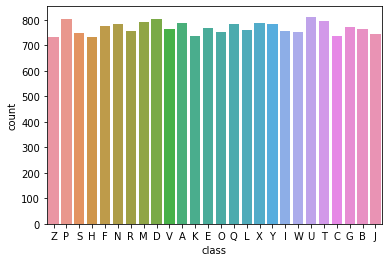

In [152]:
sns.countplot(x="class", data=df)

Now we will encode the class variable such that the targest values are integers and not characters

In [153]:
scale_mapper = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 'K':11, 'L':12, 'M':13, 'N':14, 'O':15,
                'P':16, 'Q':17, 'R':18, 'S':19, 'T':20, 'U':21, 'V':22, 'W':23, 'X':24, 'Y':25, 'Z':26}
df['class'] = df['class'].replace(scale_mapper)

In [154]:
df.dtypes

x-box    int64
y-box    int64
width    int64
high     int64
onpix    int64
x-bar    int64
y-bar    int64
x2bar    int64
y2bar    int64
xybar    int64
x2ybr    int64
xy2br    int64
x-ege    int64
xegvy    int64
y-ege    int64
yegvx    int64
class    int64
dtype: object

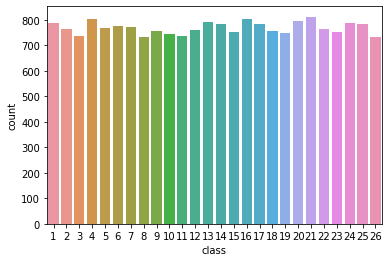

In [155]:
sns.countplot(x="class", data=df)

In [156]:
df

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,class
0,2,4,4,3,2,7,8,2,9,11,7,7,1,8,5,6,26
1,4,7,5,5,5,5,9,6,4,8,7,9,2,9,7,10,16
2,7,10,8,7,4,8,8,5,10,11,2,8,2,5,5,10,19
3,4,9,5,7,4,7,7,13,1,7,6,8,3,8,0,8,8
4,6,7,8,5,4,7,6,3,7,10,7,9,3,8,3,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5,10,5,8,3,4,10,7,8,12,10,9,2,9,2,6,3
19996,4,7,6,5,3,7,8,2,10,12,6,8,1,9,6,8,26
19997,4,8,4,6,4,7,8,7,4,10,7,6,3,9,3,7,15
19998,4,11,4,8,3,0,2,4,6,1,0,7,0,8,0,8,12


Next we will standard scale the data

In [157]:
# StandardScale the data

from sklearn.preprocessing import StandardScaler

df_dropped = df.drop('class', 1)

# also try MinMaxScaler
scaler = StandardScaler()
scaler.fit(df_dropped)

scaled_data = scaler.transform(df_dropped)

scaled_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


array([[-1.0576983 , -0.91860345, -0.55688123, ..., -0.21908163,
         0.50963994, -1.11361878],
       [-0.01230945, -0.01074302, -0.06048579, ...,  0.42746295,
         1.288757  ,  1.35944092],
       [ 1.55577381,  0.89711742,  1.42870055, ..., -2.15871536,
         0.50963994,  1.35944092],
       ...,
       [-0.01230945,  0.29187713, -0.55688123, ...,  0.42746295,
        -0.26947711, -0.49535386],
       [-0.01230945,  1.19973756, -0.55688123, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  0.59449727,  0.43590966, ..., -0.21908163,
         0.89919847,  0.12291107]])

In [158]:
from sklearn.model_selection import train_test_split

X = scaled_data
Y = df['class']

# We split the data 20/80 for testing and training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [159]:
# to use models, cannot be an array
X_model = df_dropped
Y_model = df['class']

## Classification Models

Pipeline

In [160]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold


num_cols = ['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

num_transformer = Pipeline(steps=[
    # Number of neighboring samples to use for K-nearest neighor imputation
    ('imputer', KNNImputer(n_neighbors=5)),

    # StandardScaler makes mean = 0 and scales the data to unit variance 
    ('scaler', StandardScaler())
])

########## Finally, apply column transformations

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols)
    ])

In [161]:
num_folds = 5

In [162]:
def cross_validate_model (classifier_model, X_model, Y_model):
              kfold = KFold(n_splits=3, shuffle=True, random_state=10)

               # perform model cross validation on the shuffled folds
              results = cross_val_score(classifier_model, X_model, Y_model, cv=kfold)

              # return the mean score for all folds
              return results.mean()

### Decision Tree

Decision Tree (Gini)

In [163]:
from sklearn.tree import DecisionTreeClassifier

########## A decicion tree with gini
gini_dt_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='gini'))])

gini_CV_res = cross_validate_model(gini_dt_clf, X_model, Y_model)

Decision Tree (Entropy)

In [164]:
from sklearn.tree import DecisionTreeClassifier

########## A decicion tree with entropy
entropy_dt_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='entropy'))])

entropy_CV_res = cross_validate_model(entropy_dt_clf, X_model, Y_model)

### SVC


SVC Linear Kernel

In [165]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

########## A linear kernel classifier
lin_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='linear' ,random_state=42))])

lin_svc_CV_res = cross_validate_model(lin_svc_clf, X_model, Y_model)

SVC Poly Kernel

In [142]:
########## A poly kernel classifier
poly_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='poly' ,random_state=42))])

poly_svc_CV_res = cross_validate_model(poly_svc_clf, X_model, Y_model)

SVC RBF Kernel

In [143]:
########## A RBF kernel classifier
RBF_svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='rbf' ,random_state=42))])

RBF_svc_CV_res = cross_validate_model(RBF_svc_clf, X_model, Y_model)

### Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier

########## A random forest
rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

rf_CV_res = cross_validate_model(rf_clf, X_model, Y_model)

### Extra Trees

In [145]:
from sklearn.ensemble import ExtraTreesClassifier

########## Extra trees
et_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', ExtraTreesClassifier())])

et_CV_res = cross_validate_model(et_clf, X_model, Y_model)

### SGD


In [146]:
from sklearn.linear_model import SGDClassifier

########## SGD
sgd_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SGDClassifier())])

sgd_CV_res = cross_validate_model(sgd_clf, X_model, Y_model)

### Voting Classifier


In [147]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('dt_gini', gini_dt_clf), ('dt_entropy', entropy_dt_clf), ('lin_svc', lin_svc_clf), ('poly_svc', poly_svc_clf), ('RBF_svc', RBF_svc_clf), ('rf', rf_clf), ('et', et_clf), ('sgd',sgd_clf)])

voting_CV_res = cross_validate_model(voting_clf, X_model, Y_model)

## Results

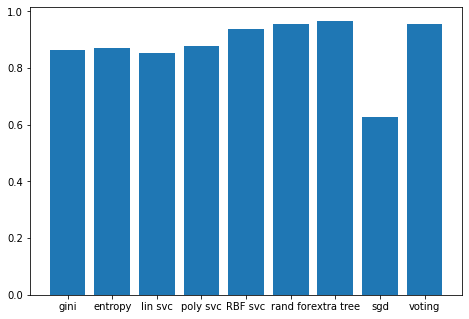

In [166]:
results = [gini_CV_res, entropy_CV_res, lin_svc_CV_res, poly_svc_CV_res, RBF_svc_CV_res, rf_CV_res, et_CV_res, sgd_CV_res, voting_CV_res]

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tests = ['gini', 'entropy', 'lin svc', 'poly svc', 'RBF svc', 'rand for', 'extra tree', 'sgd', 'voting']
ax.bar(tests,results)
plt.show()

In [167]:
print(rf_CV_res)
print(et_CV_res)
print(voting_CV_res)

0.9566499022783633
0.9672999923361166
0.9564500322838644


Here we see all the models' accuracy plotted. We see that the top preforming models are the random forest, the extra trees, and the voting. Voting has not outpreformed every individual model. The reason for this is that it can over fit when using too many models as can be in this case. Sometimes a simpler solution is a better solution when trying to train and test models. Overly complex models can be less accurate and efficient than a simple model. 

### Feature importances

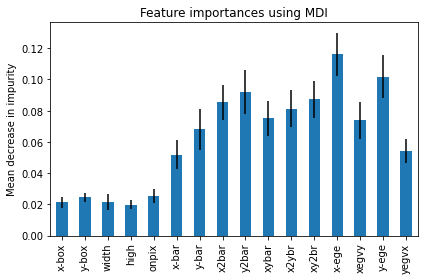

In [168]:
import numpy as np
forest = RandomForestClassifier()
forest.fit(X_model, Y_model)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

feature_names = ['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

the above graph shows that the most important features are the x-ege (the number of edges from left to right) and the y-ege (the number of edges from top to bottom). These values indicate which of these features have the most impact when it comes to the model guessing the target value (in this case the class). All trees will not have the same importance of features since they will be trained differently, and look at the data in a different way. 

## K Means

In [183]:
from sklearn.cluster import KMeans

k= 10
kmeans = KMeans(n_clusters=k, random_state=42)

In [184]:
kmeans.fit(X)

KMeans(n_clusters=10, random_state=42)

In [185]:
kmeans.inertia_

168268.67163705506

In [186]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 25)]
inertias = [model.inertia_ for model in kmeans_per_k]

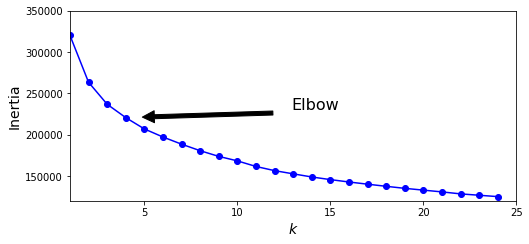

In [191]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 25), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 25, 120000, 350000])
plt.show()

In [192]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.13959309688855684

In [193]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

In [197]:
silhouette_scores

[0.16074811794950652,
 0.1512944565181951,
 0.12371042295778754,
 0.13174197872941096,
 0.13623569936182328,
 0.13375217954115207,
 0.13952178657333172,
 0.13819795030672755,
 0.13959309688855684,
 0.14280817426152698,
 0.14661802186934433,
 0.1487749269522235,
 0.14528073579521078,
 0.14535053870872106,
 0.14597417546352118,
 0.13680819370268021,
 0.13946293322602443,
 0.14154943939564987,
 0.139488435693717,
 0.13734800776756725,
 0.14323202396659493,
 0.1408715951239921,
 0.14030682219142232]

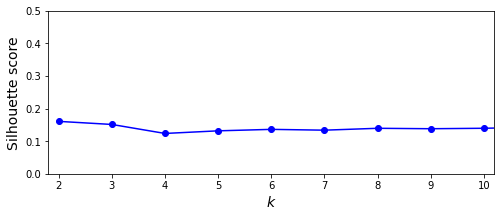

In [203]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 25), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 10.2, 0, 0.5])
plt.show()

## 3D Plot

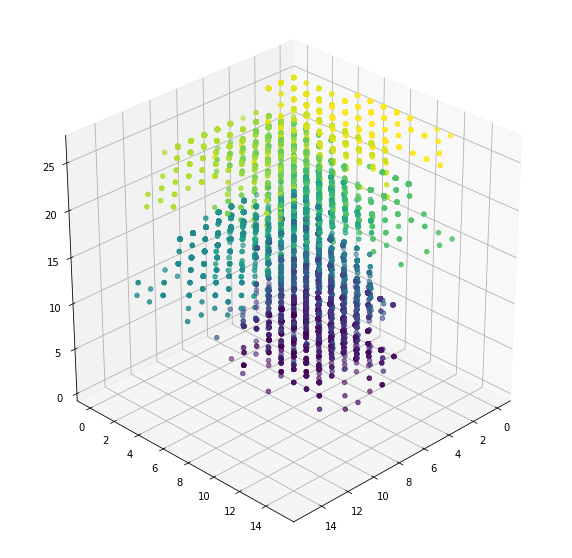

In [204]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Set up data for three-dimensional scattered points; use the 26 labels for color map
ax.scatter3D(df['x-ege'], df['y-ege'], df['class'], c=df['class'])

# rotate the axes and update the view
ax.view_init(30, 45)
plt.draw()

From this 3D model, we see that by the density of the points, that there is almost a layering pattern to the data form the two influential steps. The center of the 3D graph show that there is a sense gathering around that area, showing that there is a relationship between the predicted class and these two variables. 

## Summary


### Overall Performance
The best performing models were the voting, extra trees, random forest, and the RBF svc. All of these models had accuracy close to 100%. Overall, all of the models had good accuracy above 80% except for sgd which had a accuracy of around 60%.

**SVC Performance**

Between the three kernels used (linear, ploy, RBF), the best was the RBF kernel with an accuracy of around 94%. Then, it was followed by poly kernel with around 85% accuracy and finally linear with a accuracy of around 82%.

**Tree Based Performance**

For the decision tree models, entropy was slightly more accuract then gini with both models having an accuracy of around 82%. These models were not the best for this problem as they performed worse than the SVC models. 

**Other Models Performance**

The other models used where the random forest, extra trees, voting, and SGD. between these three, random forest, voting, and extra trees were the most accurate out of all models with accuracies of around 95% and 96%. The most accurate model being the extra trees. 

**Feature Importance**

In determining which features were most prevelant in determining which class to put the data, teh x and y edges were the two most prevelant with x edges being significantly larger. The least important features were hight, width, and onpix. These features importances are significant because they allow for us to see which features are neccessary to look at when training models and which we can ignore. This helps us be more percise with creating and training models based on data. 

### K-Means

Using k-means, it showed that the best number of clusters for this data was 4 (as seen in the elbow plot). But, what was interesting was that the silhouette graph shows that at k=4, the graph is at the lowest. This is interesting since this is the opposite result of what we would expect looking at the elbow graph.  